In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import mean_squared_error
plt.style.use('seaborn-whitegrid')
     

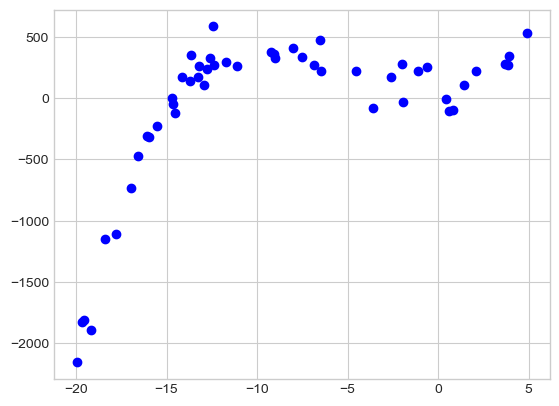

In [2]:
#Function

noise_scale = 100
num_of_samples = 50

x = 25 * (np.random.rand(num_of_samples, 1) - 0.8)   
x.sort(axis = 0)   
y = 7 * x + 15 * x ** 2 + 1 * x ** 3 + noise_scale * np.random.randn(num_of_samples, 1) 
plt.plot(x,y,'bo')
      

<function matplotlib.pyplot.show(close=None, block=None)>

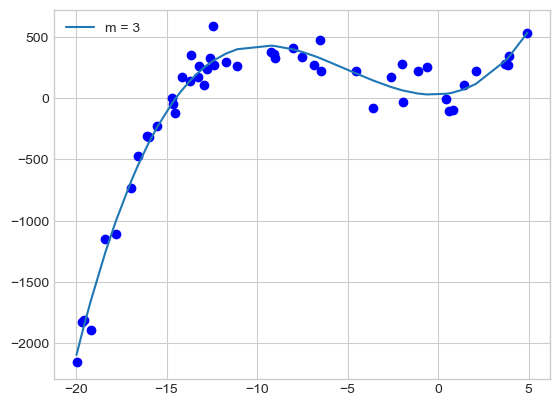

In [3]:
#From homework 1

m=3
x = x.ravel() 
y = y.ravel()
z = np.polyfit(x, y, m) 
p = np.poly1d(z) 
plt.plot(x,y, 'bo')
plt.plot(x, p(x),'-', label = 'm = 3')
plt.legend()
plt.show

In [4]:
def evaluate(y_actual, y_pred):
     
    return np.sum((y_actual - y_pred) ** 2)

badness_poly = evaluate(y, p(x))

# Initializing the models
num_of_chromosomes = 100
genes_per_chromosome = 4
chromosomes = np.random.uniform(low = -10, high = 10, size = (num_of_chromosomes, genes_per_chromosome))
chromosomes[0]

array([ 1.55540196,  1.17851815, -5.67526581, -3.46886663])

In [5]:
#Creating badness list

def create_badness_list(chromosomes):
    
    badness_list = []
    
    for i in range(num_of_chromosomes):
        genetic_coef = np.poly1d(chromosomes[i])    
        y_genetic = genetic_coef(x)    
        badness = evaluate(y, y_genetic)    
        badness_list.append(badness)
        
    return badness_list

In [6]:
#Creating crossover function

def crossover(parents, offspring_size, rate):
   
    offspring = np.zeros(offspring_size)
    crossover_point = int(genes_per_chromosome / 2)   
    
    for i in range(offspring_size[0]):
        random_num = np.random.uniform(0, 1)    
        if float(random_num) > float(rate):    
            offspring[i] = parents[-1]    
            
        parent_1_idx = i % parents.shape[0]    
        parent_2_idx = (i + 1) % parents.shape[0]   
        offspring[i, 0:crossover_point] = parents[parent_1_idx, 0:crossover_point]    
        offspring[i, crossover_point:] = parents[parent_2_idx, crossover_point:]    
        
    return offspring

In [7]:
#Mutation function

def mutation(offspring_crossover, rate):
    
    for i in range(offspring_crossover.shape[0]):
        random_num = np.random.uniform(0, 1)    
        if float(random_num) > float(rate):   
            continue
            
        random_idx = random.randrange(0, genes_per_chromosome - 1)    
        random_value = np.random.uniform(0, 2)    
        offspring_crossover[i, random_idx] = offspring_crossover[i, random_idx] * random_value    
        
    return offspring_crossover

In [8]:
# Main function

best_badness_list = []    
for iteration in range(2500):
    badness_list = create_badness_list(chromosomes)
    top_10_chromosomes_idx = sorted(range(len(badness_list)), key=lambda i: badness_list[i], reverse=True)[-10:]
    best_badness = badness_list[top_10_chromosomes_idx[-1]]
    best_badness_list.append(best_badness)
    top_10_chromosomes = np.zeros((10, genes_per_chromosome))
    
    for i, j in enumerate(top_10_chromosomes_idx):
        top_10_chromosomes[i] = chromosomes[j]
    offspring_crossover = crossover(top_10_chromosomes, (num_of_chromosomes - 10, genes_per_chromosome), 0.8)
    offspring_mutation = mutation(offspring_crossover, 0.1)
    
    new_chromosomes = np.zeros((num_of_chromosomes, genes_per_chromosome))
    new_chromosomes[0:10, :] = top_10_chromosomes
    new_chromosomes[10:, :] = offspring_mutation
    chromosomes = new_chromosomes
    
y_genetic = np.poly1d(top_10_chromosomes[-1])

Text(0.5, 1.0, 'Polynimal - Both Methods')

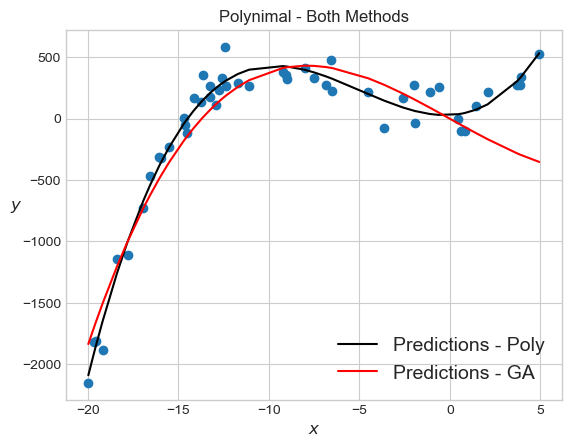

In [9]:
plt.scatter(x, y)    
plt.plot(x, p(x), color = 'black', label = 'Predictions - Poly')    
plt.plot(x, y_genetic(x), color = 'red', label = 'Predictions - GA')    # plot GA 
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.legend(loc="lower right", fontsize=14)
plt.title('Polynimal - Both Methods')

Above is a depiction of the initial noisy data, the polynomial created using the method from HW1, and the polynomial created using a genetic algorithm. The evolutionary algorithm managed to build a really good polynomial with a decent badness score, even though it did not quite fit the data as well as the original polynomial did. The algorithm's several iterations produced both better and worse outcomes.

It would be a good idea to run the technique several times and pick the best outcomes. Various solutions can be obtained based on the initial values of the genes as well as the crossover and mutation rates, which is another reason to run the algorithm numerous times while analyzing various values.